<a href="https://colab.research.google.com/github/samgubil/samgubil/blob/main/Big_Data_Workshpbiloloo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**PySpark** is the Python library for **Apache Spark**, an open-source, distributed computing system designed to process large volumes of data quickly and efficiently. It combines the power of Spark's distributed computing capabilities with the ease and flexibility of the Python programming language. PySpark is particularly well-suited for big data processing, machine learning, and graph processing tasks.

Apache Spark can process data in parallel across a cluster of computers, allowing it to handle massive datasets with ease. It is built on top of the **Hadoop Distributed File System (HDFS)** and can also process data from other storage systems like Amazon S3, Apache HBase, Apache Cassandra, and more.

PySpark provides a simple and intuitive API that allows developers to express complex data transformations, aggregations, and machine learning algorithms with just a few lines of code. The library includes a rich set of functions and data structures for working with structured and semi-structured data, such as **DataFrames** and **Datasets**.

In this tutorial, you will learn how to set up PySpark on **Google Colab**, a popular platform for interactive Python development in the cloud. This will enable you to leverage the power of Apache Spark without the need for local installation or configuration. We will cover various aspects of working with PySpark DataFrames, including data manipulation, transformation, and analysis, as well as integration with machine learning libraries.

By the end of this tutorial, you will have a solid understanding of PySpark and its applications in big data processing.

#**Installing PySpark in Google Colab**

In [1]:
# Hide warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=94c020385b2491e6c122260167444d5c90c6d1b9dd1aefbd1e97c1750ffb79fa
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

#**Loading data in Spark dataframe**

In [4]:
# Download data
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

data_path = 'iris.csv'

--2023-06-25 08:41:55--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2023-06-25 08:41:55 (47.3 MB/s) - ‘iris.csv’ saved [3716/3716]



In [5]:
#@title
# # Alternative data source - 1
# !wget https://archive.ics.uci.edu/static/public/53/iris.zip
# !unzip iris.zip
# data_path = 'iris.data'

#########################################

# # Alternative data source -2
# !wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv
# data_path = 'iris.csv'

In [7]:
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

# Manually setup the column names and data types.
schema = StructType([
    StructField('sepal_length', DoubleType(), True),
    StructField('sepal_width', DoubleType(), True),
    StructField('petal_length', DoubleType(), True),
    StructField('petal_width', DoubleType(), True),
    StructField('species', StringType(), True)
])

df = spark.read.options(header=True).csv(data_path, schema=schema)
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [8]:
df.show(10)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



**Viewing Dataframe Columns**

In [9]:
columns = list(df.columns)
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

**Dataframe Schema**

In [10]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [11]:
df.dtypes

[('sepal_length', 'double'),
 ('sepal_width', 'double'),
 ('petal_length', 'double'),
 ('petal_width', 'double'),
 ('species', 'string')]

#**DataFrame Operations on Columns**

We will go over the following in this section:

1.   Selecting Columns
2.   Selecting Multiple Columns
3.   Adding New Columns
4.   Grouping By Columns
5.   Removing Columns
6.   Use filter

**Selecting Columns**

In [14]:
# Column name is case sensitive in this usage
print(df.species)
print("*"*20)
df.select(df.species).show(truncate=False)

Column<'species'>
********************
+-------+
|species|
+-------+
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
|setosa |
+-------+
only showing top 20 rows



In [17]:
print(df.species, df.petal_length)
print("*"*40)
df.select(df.species, df.petal_length).show(truncate=False)

Column<'species'> Column<'petal_length'>
****************************************
+-------+------------+
|species|petal_length|
+-------+------------+
|setosa |1.4         |
|setosa |1.4         |
|setosa |1.3         |
|setosa |1.5         |
|setosa |1.4         |
|setosa |1.7         |
|setosa |1.4         |
|setosa |1.5         |
|setosa |1.4         |
|setosa |1.5         |
|setosa |1.5         |
|setosa |1.6         |
|setosa |1.4         |
|setosa |1.1         |
|setosa |1.2         |
|setosa |1.5         |
|setosa |1.3         |
|setosa |1.4         |
|setosa |1.7         |
|setosa |1.5         |
+-------+------------+
only showing top 20 rows



**Adding new columns**

In [19]:
from pyspark.sql.functions import lit
df = df.withColumn('type',lit('flower'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+------------+-----------+------------+-----------+-------+------+
|sepal_length|sepal_width|petal_length|petal_width|species|type  |
+------------+-----------+------------+-----------+-------+------+
|5.1         |3.5        |1.4         |0.2        |setosa |flower|
|4.9         |3.0        |1.4         |0.2        |setosa |flower|
|4.7         |3.2        |1.3         |0.2        |setosa |flower|
|4.6         |3.1        |1.5         |0.2        |setosa |flower|
|5.0         |3.6        |1.4         |0.2        |setosa |flower|
+------------+-----------+------------+-----------+-------+------+
only showing top 5 rows



**Merging two existing columns**

In [20]:
from pyspark.sql.functions import concat
from pyspark.sql.functions import col
df = df.withColumn('result', concat(col("species"), lit(" "), col("type")))
# 'concat' is a function that concatenates the values of multiple columns into a single column.
# In this example, it concatenates the values in the "species" column, a space character, and the values in the "type" column.
df.show(5,truncate=False)

+------------+-----------+------------+-----------+-------+------+-------------+
|sepal_length|sepal_width|petal_length|petal_width|species|type  |result       |
+------------+-----------+------------+-----------+-------+------+-------------+
|5.1         |3.5        |1.4         |0.2        |setosa |flower|setosa flower|
|4.9         |3.0        |1.4         |0.2        |setosa |flower|setosa flower|
|4.7         |3.2        |1.3         |0.2        |setosa |flower|setosa flower|
|4.6         |3.1        |1.5         |0.2        |setosa |flower|setosa flower|
|5.0         |3.6        |1.4         |0.2        |setosa |flower|setosa flower|
+------------+-----------+------------+-----------+-------+------+-------------+
only showing top 5 rows



**Grouping by Columns**

In [22]:
# Group By a column in PySpark
df.groupBy('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



In [23]:
# Group By multiple columns in PySpark
df.groupBy('species', 'sepal_length').count().show()

+----------+------------+-----+
|   species|sepal_length|count|
+----------+------------+-----+
| virginica|         4.9|    1|
|    setosa|         4.8|    5|
|versicolor|         6.8|    1|
|    setosa|         4.9|    4|
|versicolor|         5.2|    1|
|versicolor|         5.9|    2|
|versicolor|         6.9|    1|
|versicolor|         5.1|    1|
|versicolor|         5.7|    5|
| virginica|         7.9|    1|
| virginica|         7.3|    1|
|versicolor|         7.0|    1|
|    setosa|         5.1|    8|
|    setosa|         4.6|    4|
|    setosa|         5.3|    1|
|versicolor|         5.4|    1|
| virginica|         6.7|    5|
|    setosa|         5.2|    3|
| virginica|         7.7|    4|
| virginica|         6.1|    2|
+----------+------------+-----+
only showing top 20 rows



**Removing Columns**

In [25]:
#Remove columns in PySpark
df = df.drop('result')
df = df.drop('type')
df.show(5,truncate=False)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|5.1         |3.5        |1.4         |0.2        |setosa |
|4.9         |3.0        |1.4         |0.2        |setosa |
|4.7         |3.2        |1.3         |0.2        |setosa |
|4.6         |3.1        |1.5         |0.2        |setosa |
|5.0         |3.6        |1.4         |0.2        |setosa |
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



**Use filter**

In [26]:
df.filter(df['sepal_length']==5.1).show()

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|
+------------+-----------+------------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2|    setosa|
|         5.1|        3.5|         1.4|        0.3|    setosa|
|         5.1|        3.8|         1.5|        0.3|    setosa|
|         5.1|        3.7|         1.5|        0.4|    setosa|
|         5.1|        3.3|         1.7|        0.5|    setosa|
|         5.1|        3.4|         1.5|        0.2|    setosa|
|         5.1|        3.8|         1.9|        0.4|    setosa|
|         5.1|        3.8|         1.6|        0.2|    setosa|
|         5.1|        2.5|         3.0|        1.1|versicolor|
+------------+-----------+------------+-----------+----------+



#**Visualization**

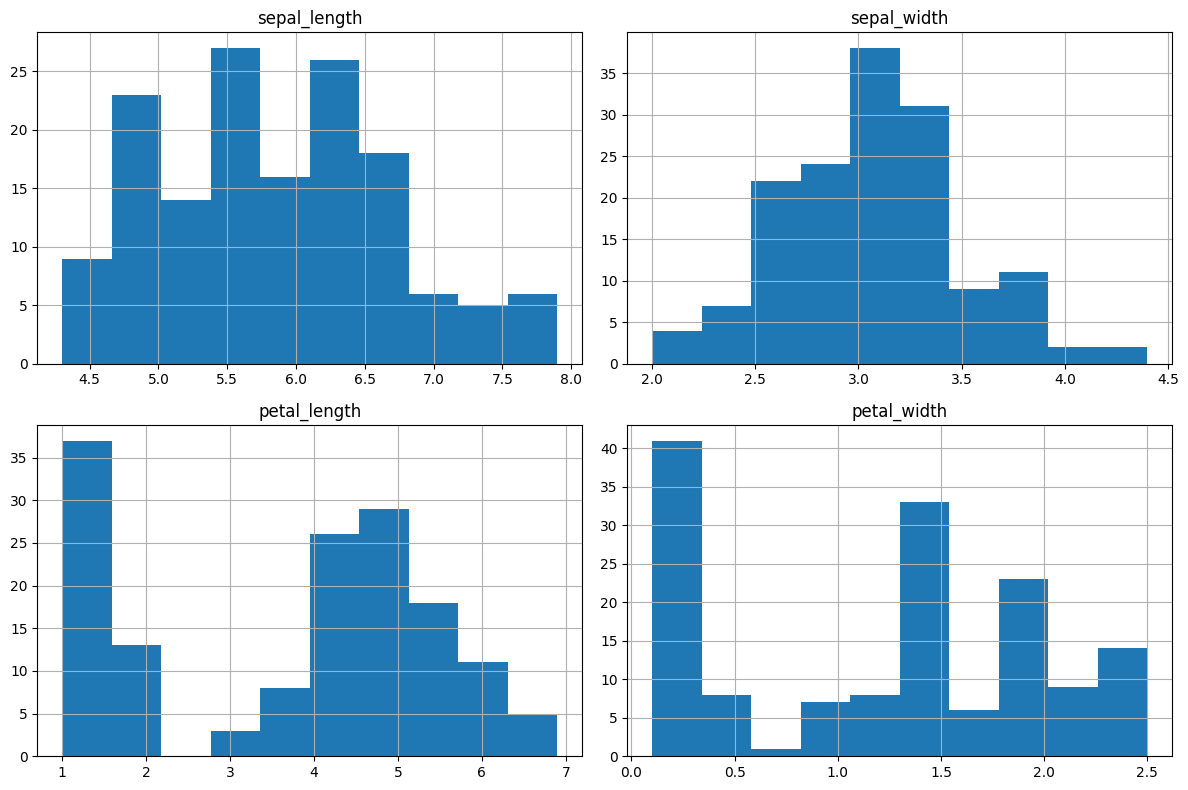

In [28]:
# Visualize the distribution for each numerical column
import matplotlib.pyplot as plt

# Convert the spark dataframe to Pandas dataframe
df_pd = df.toPandas()
df_pd.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


#**Machine Learning on Data**

First, we need to convert the categorical label column species into a numerical label column label using the StringIndexer transformer from the pyspark.ml.feature module:

In [ ]:
from pyspark.ml.feature import StringIndexer

label_indexer = StringIndexer(inputCol='species', outputCol='label')
df = label_indexer.fit(df).transform(df)

In [36]:
# Check how the species are indexed
df.groupBy(df.species, df.label).count().show(5)

+----------+-----+-----+
|   species|label|count|
+----------+-----+-----+
|    setosa|  0.0|   50|
| virginica|  2.0|   50|
|versicolor|  1.0|   50|
+----------+-----+-----+



Next, we need to split the data into training and testing sets using the randomSplit() method

In [37]:
train_data, test_data = df.randomSplit([0.7, 0.3], seed=42)

We need to create a feature vector from the input features (i.e., 'sepal_length', 'sepal_width', 'petal_length', 'petal_width') in order to train a machine learning model. We can use the VectorAssembler transformer from the pyspark.ml.feature module to create the feature vector:

In [38]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], outputCol='features')
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

Now that we have prepared the data, we can train and evaluate a machine learning model on the iris dataset. We will use a simple logistic regression model:

In [39]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train a logistic regression model on the training data
lr = LogisticRegression(featuresCol='features', labelCol='label', maxIter=10)
lr_model = lr.fit(train_data)

# Make predictions on the testing data
lr_predictions = lr_model.transform(test_data)

# Evaluate the accuracy of the model
lr_evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label', metricName='accuracy')
lr_accuracy = lr_evaluator.evaluate(lr_predictions)

print(f'Logistic Regression accuracy: {lr_accuracy:.4f}')

Logistic Regression accuracy: 0.9783


Finally, we can interpret the results of the machine learning model. For example, we can display the predicted labels and actual labels for the first 10 rows of the testing data using the show() method:

In [40]:
lr_predictions.select('prediction', 'label').show(20)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  1.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  1.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 20 rows



We can also compute the confusion matrix and other classification metrics:

In [41]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate the logistic regression model
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='label')

# Compute the confusion matrix and other classification metrics for the logistic regression model
lr_confusion_matrix = lr_predictions.groupBy('label', 'prediction').count().orderBy('label', 'prediction').toPandas().pivot('label', 'prediction', 'count').fillna(0)
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: 'weightedPrecision'})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: 'weightedRecall'})
lr_f1_score = evaluator.evaluate(lr_predictions, {evaluator.metricName: 'f1'})

# Print the classification metrics for the logistic regression model
print('Logistic Regression Classification Metrics\n\n')
print(f'Confusion Matrix:\n{lr_confusion_matrix}\n')
print(f'Precision: {lr_precision:.4f}\n')
print(f'Recall: {lr_recall:.4f}\n')
print(f'F1 Score: {lr_f1_score:.4f}')

Logistic Regression Classification Metrics


Confusion Matrix:
prediction   0.0   1.0  2.0
label                      
0.0         22.0   0.0  0.0
1.0          0.0  14.0  1.0
2.0          0.0   0.0  9.0

Precision: 0.9804

Recall: 0.9783

F1 Score: 0.9785


# **Todo Practices**

Refer to the PySpark official documentation for more info about spark dataframe:  https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html

In [42]:
#### Please run below code to reload the dataframe ####
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

# Manually setup the column names and data types.
schema = StructType([
    StructField('sepal_length', DoubleType(), True),
    StructField('sepal_width', DoubleType(), True),
    StructField('petal_length', DoubleType(), True),
    StructField('petal_width', DoubleType(), True),
    StructField('species', StringType(), True)
])

df = spark.read.options(header=True).csv(data_path, schema=schema)

## Q1. Select column "sepal_length", "sepal_width".

In [43]:
print('sepal_length', 'sepal_width')
print("*"*40)
df.select(df.sepal_length, df.sepal_width).show(truncate=False)

sepal_length sepal_width
****************************************
+------------+-----------+
|sepal_length|sepal_width|
+------------+-----------+
|5.1         |3.5        |
|4.9         |3.0        |
|4.7         |3.2        |
|4.6         |3.1        |
|5.0         |3.6        |
|5.4         |3.9        |
|4.6         |3.4        |
|5.0         |3.4        |
|4.4         |2.9        |
|4.9         |3.1        |
|5.4         |3.7        |
|4.8         |3.4        |
|4.8         |3.0        |
|4.3         |3.0        |
|5.8         |4.0        |
|5.7         |4.4        |
|5.4         |3.9        |
|5.1         |3.5        |
|5.7         |3.8        |
|5.1         |3.8        |
+------------+-----------+
only showing top 20 rows



## Q2. Add a new column with name "Zero" with all values being 0. Show the new dataframe and then delete this column and show the dataframe again.

In [44]:
## Your answer

In [45]:
from pyspark.sql.functions import lit
df = df.withColumn('Zero',lit('0'))
# lit means literal. It populates the row with the literal value given.
# When adding static data / constant values, it is a good practice to use it.
df.show(5,truncate=False)

+------------+-----------+------------+-----------+-------+----+
|sepal_length|sepal_width|petal_length|petal_width|species|Zero|
+------------+-----------+------------+-----------+-------+----+
|5.1         |3.5        |1.4         |0.2        |setosa |0   |
|4.9         |3.0        |1.4         |0.2        |setosa |0   |
|4.7         |3.2        |1.3         |0.2        |setosa |0   |
|4.6         |3.1        |1.5         |0.2        |setosa |0   |
|5.0         |3.6        |1.4         |0.2        |setosa |0   |
+------------+-----------+------------+-----------+-------+----+
only showing top 5 rows



## Q3. Select all rows where the 'petal_length' is larger than 1.5 and show.

In [ ]:
## Your answer

In [46]:
df.filter(df['petal_length']==1.5).show()

+------------+-----------+------------+-----------+-------+----+
|sepal_length|sepal_width|petal_length|petal_width|species|Zero|
+------------+-----------+------------+-----------+-------+----+
|         4.6|        3.1|         1.5|        0.2| setosa|   0|
|         5.0|        3.4|         1.5|        0.2| setosa|   0|
|         4.9|        3.1|         1.5|        0.1| setosa|   0|
|         5.4|        3.7|         1.5|        0.2| setosa|   0|
|         5.7|        4.4|         1.5|        0.4| setosa|   0|
|         5.1|        3.8|         1.5|        0.3| setosa|   0|
|         5.1|        3.7|         1.5|        0.4| setosa|   0|
|         5.2|        3.5|         1.5|        0.2| setosa|   0|
|         5.4|        3.4|         1.5|        0.4| setosa|   0|
|         5.2|        4.1|         1.5|        0.1| setosa|   0|
|         4.9|        3.1|         1.5|        0.1| setosa|   0|
|         4.9|        3.1|         1.5|        0.1| setosa|   0|
|         5.1|        3.4

## Q4. For all the rows that you have filtered in Q3, group them by species and count each group.

In [47]:
## Your answer

In [48]:
from numpy.lib.function_base import diff
df.filter(df['petal_length']==1.5).groupBy('species').count().show()

+-------+-----+
|species|count|
+-------+-----+
| setosa|   14|
+-------+-----+



In [49]:
df.groupBy('petal_length').count().show()

+------------+-----+
|petal_length|count|
+------------+-----+
|         5.4|    2|
|         3.5|    2|
|         6.1|    3|
|         6.6|    1|
|         3.7|    1|
|         4.5|    8|
|         5.7|    3|
|         1.4|   12|
|         1.7|    4|
|         6.7|    2|
|         4.9|    5|
|         1.0|    1|
|         4.1|    3|
|         4.0|    5|
|         1.9|    2|
|         3.9|    3|
|         3.8|    1|
|         5.1|    8|
|         4.2|    4|
|         1.3|    7|
+------------+-----+
only showing top 20 rows

